In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from statsmodels.tsa.ar_model import  AutoReg

In [12]:
df=pd.read_csv("infantMseries.csv",index_col=0,parse_dates=True)

/var/folders/cz/fk8gczx52ss7yswk1p4l28km0000gn/T/ipykernel_68144/2399958018.py:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  df=pd.read_csv("infantMseries.csv",index_col=0,parse_dates=True)


In [13]:
df.tail()

,Infant
Date,
2012-01-01,49.537270
2013-11-20,47.286049
2014-09-17,45.197770
2015-04-03,43.224020
2016-06-08,47.360000


In [15]:
x=df.values

<Axes: xlabel='Date'>

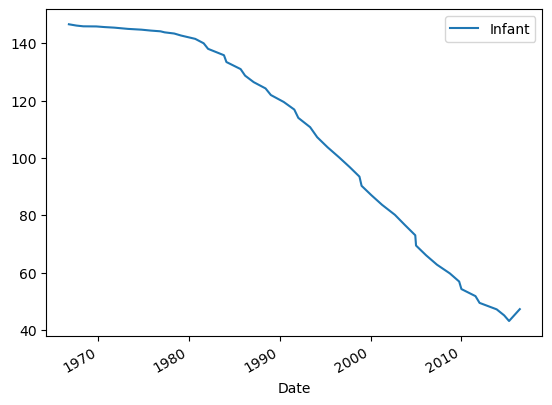

In [16]:
df.plot()

In [17]:
from statsmodels.tsa.stattools import adfuller

In [18]:
dftest=adfuller(df['Infant'], autolag='AIC')

In [19]:
print(" 1: ADF: ", dftest[0])
print(" 2: P-value ", dftest[1])
print(" 3: number of lag: ", dftest[2])

 1: ADF:  -3.5462499121294218
 2: P-value  0.006875774445915708
 3: number of lag:  1


In [20]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf

/Users/kasahunabdisa/anaconda3/lib/python3.10/site-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


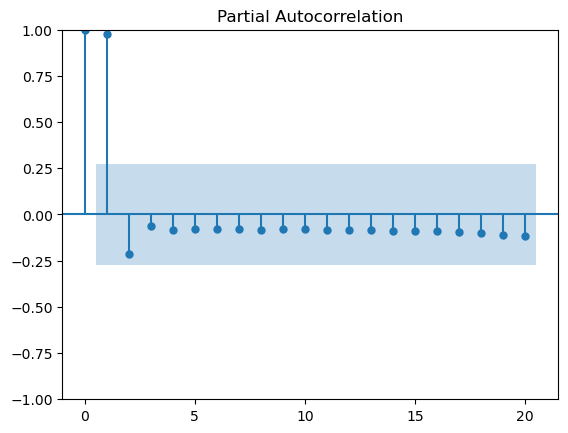

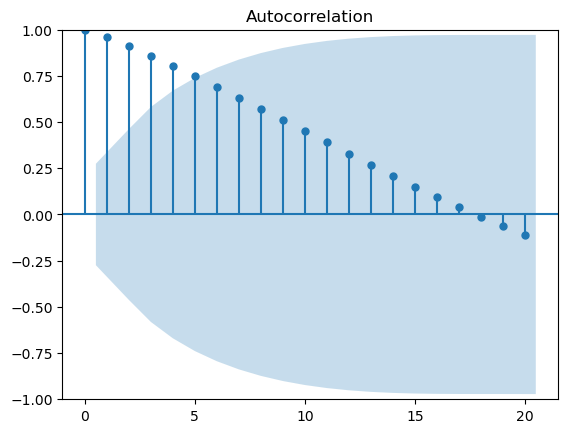

In [21]:
pacf=plot_pacf(df['Infant'], lags=20)
acf=plot_acf(df['Infant'], lags=20)

In [27]:
xtrain=x[:len(x)-3]
xtest=x[len(x)-3:]

In [28]:
model=AutoReg(xtrain,lags=3).fit()

In [29]:
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                   48
Model:                     AutoReg(3)   Log Likelihood                  32.788
Method:               Conditional MLE   S.D. of innovations              0.117
Date:                Mon, 30 Oct 2023   AIC                            -55.576
Time:                        16:48:29   BIC                            -46.543
Sample:                             3   HQIC                           -52.209
                                   48                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0428      0.161      0.266      0.790      -0.272       0.358
y.L1           2.6247      0.113     23.165      0.000       2.403       2.847
y.L2          -2.2652      0.234     -9.686      0.0

In [25]:
pred=model.predict(start=len(xtrain),end=len(x)-1,dynamic=False)

[45.13499272 43.08425162 41.13418267]


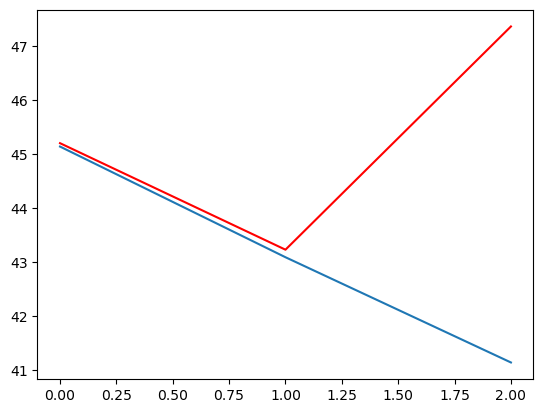

In [26]:
from matplotlib import pyplot
pyplot.plot(pred)
pyplot.plot(xtest, color='red')
print(pred)

In [ ]:
#The possible lags and theire results: Lag four performs better and its test result and error rate  is good
49.32071855 47.08533455 44.65666179=3
[49.21294827 46.89518642 44.5033642 =2
 [48.06152381 44.64669804 41.20681198]=1
 [49.38419201 47.32650612 45.22235525]=4
 #projection Results  of lag3 for the next  ten years 
 
 [39.0547382  35.87935112 32.49164559 28.93637747 25.26257126 21.51734857
 17.74142356 13.96634081 10.21333089  6.49351857]
  #projection Results  of lag4 for the next ten years 

[40.74093903 38.33377507 35.81432805 33.19120365 30.47756494 27.68898847
 24.8417525  21.95155228 19.0326102  16.09713102]

In [30]:
#error calculation
from math import sqrt
from sklearn.metrics import mean_squared_error
rmse=sqrt(mean_squared_error(xtest,pred))
print(rmse)

3.5955656796992073


In [31]:
#making future predictions

pred_future=model.predict(start=len(x)+1, end=len(x)+9, dynamic=False)

In [32]:
print("Predict the next ten year Infant mortality")
print(pred_future)
print("Number of predictions made :\t:", len(pred_future))

Predict the next ten year Infant mortality
[37.53760582 35.89165515 34.34738446 32.90465341 31.56311937 30.32223266
 29.18123685 28.13917247 27.19488306]
Number of predictions made :	: 9


In [ ]:
#use Arima Model for forecasting and for confidence interval

In [34]:
from statsmodels.tsa.arima.model import ARIMA

In [35]:
model = ARIMA(x, order=(2,0,0))

In [7]:
model_fit = model.fit()

/Users/kasahunabdisa/anaconda3/lib/python3.10/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'


In [36]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                   51
Model:                 ARIMA(2, 0, 0)   Log Likelihood                 -67.937
Date:                Mon, 30 Oct 2023   AIC                            143.874
Time:                        16:49:15   BIC                            151.602
Sample:                             0   HQIC                           146.827
                                 - 51                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        115.7892     38.553      3.003      0.003      40.226     191.352
ar.L1          1.9636      0.056     34.905      0.000       1.853       2.074
ar.L2         -0.9719      0.057    -17.043      0.000      -1.084      -0.860
sigma2         0.6832      0.157      4.349      0.000       0.375       0.991
===================================================================================
Ljung-Box (L1) (Q):                   0.04   Jarque-Bera (JB):              2855.15
Prob(Q):                              0.85   Prob(JB):                         0.00
Heteroskedasticity (H):              23.20   Skew:                             5.68
Prob(H) (two-sided):                  0.00   Kurtosis:                        37.85
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [37]:
result = model_fit.get_forecast(9)

In [43]:
#print(result.predicted_mean)

In [ ]:
37.53760582 35.89165515 34.34738446 32.90465341 31.56311937 30.32223266
 29.18123685 28.13917247 27.19488306

In [422]:
#confidence interval
ci = result.conf_int(0.05)

In [423]:
print(ci) 

[[38.59809327 39.2476677 ]
 [36.27202673 37.72180895]
 [34.01580598 36.43623821]
 [31.84696743 35.38053093]
 [29.77857894 34.54800878]
 [27.82103497 33.93393213]
 [25.9829675  33.53457828]
 [24.27173058 33.34674792]
 [22.69367955 33.36747845]]


In [ ]:
#Draw projection with Confidence interval

In [44]:
import plotly.graph_objs as go
import pandas as pd

df = pd.read_csv('ARInfantNationalTrend.csv')

fig = go.Figure([
    go.Scatter(
        name='Mean',
        x=df['Year'],
        y=df['Mean'],
        mode='lines',
        line=dict(color='rgb(31, 119, 180)'),
    ),
    go.Scatter(
        name='Upper Bound',
        x=df['Year'],
        y=df['Upper_Bound'],
        mode='lines',
        marker=dict(color="#444"),
        line=dict(width=0),
        showlegend=False
    ),
    go.Scatter(
        name='Lower Bound',
        x=df['Year'],
        y=df['Lower_Bound'],
        marker=dict(color="#444"),
        line=dict(width=0),
        mode='lines',
        fillcolor='rgba(0, 150, 255, 0.3)',
        fill='tonexty',
        showlegend=False
    )
])
fig.update_layout(
    yaxis_title='National Infant Mortality  rate  ',
    title='National Infant Mortality  Trend to 2025',
    hovermode="x"
)
fig.show()

In [41]:
df = pd.read_csv('ARInfantNationalTrend.csv')

In [42]:
df.tail()

,Year,Mean,Lower_Bound,Upper_Bound
5,2021,32.16,29.77,34.55
6,2022,30.87,27.82,33.93
7,2023,29.75,25.98,33.53
8,2024,28.80,24.27,33.34
9,2025,28.03,22.69,33.36
